<a href="https://colab.research.google.com/github/tfarmstrong309/LegoSortingModel/blob/main/imageTrainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import kagglehub
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print('Tensor Flow Version:',tf.__version__, '\n')

Tensor Flow Version: 2.17.1 



In [43]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab Notebooks/LegoDatasets

!ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Colab Notebooks/LegoDatasets
FranciscoGarciaLegoDataset  lego1x1Brick.JPG  lego_model.h5
JoostHazelzetLegoDataset    lego2x2Brick.JPG  lego_model.keras


In [44]:
# Define some parameters for the loader:
batch_size = 32
img_height = 200
img_width = 200

# It's good practice to use a validation split when developing your model.
# Use 80% of the images for training and 20% for validation.

filepath = "JoostHazelzetLegoDataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
  filepath,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred')

val_ds = tf.keras.utils.image_dataset_from_directory(
  filepath,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)



Found 424 files belonging to 16 classes.
Using 340 files for training.
Found 424 files belonging to 16 classes.
Using 84 files for validation.
['11214 Bush 3M friction with Cross axle', '18651 Cross Axle 2M with Snap friction', '2357 Brick corner 1x2x2', '3003 Brick 2x2', '3004 Brick 1x2', '3005 Brick 1x1', '3022 Plate 2x2', '3023 Plate 1x2', '3024 Plate 1x1', '3040 Roof Tile 1x2x45deg', '3069 Flat Tile 1x2', '32123 half Bush', '3673 Peg 2M', '3713 Bush for Cross Axle', '3794 Plate 1X2 with 1 Knob', '6632 Technic Lever 3M']


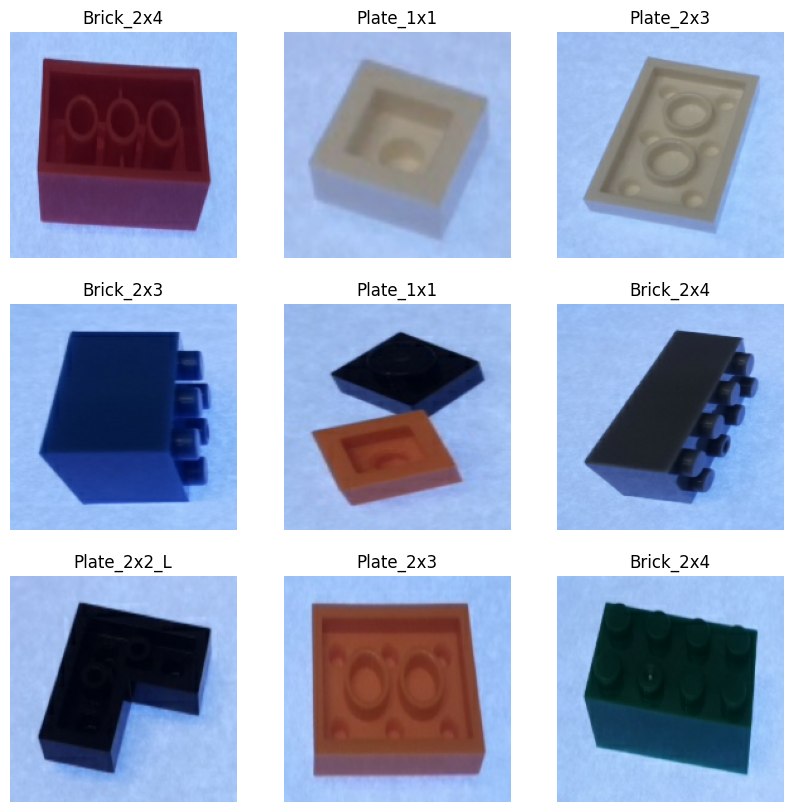

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:


# The Keras Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them.
# There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').
# This model has not been tuned for high accuracy; the goal of this tutorial is to show a standard approach.

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# For this tutorial, choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function.
# To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Train the model for 10 epochs with the Keras Model.fit method:

epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Visualize the Results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,991,220 (15.23 MB)

 Trainable params: 3,991,220 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.2390 - loss: 2.0127 - val_accuracy: 0.6234 - val_loss: 1.1860
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5879 - loss: 1.1224 - val_accuracy: 0.7489 - val_loss: 0.7223
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7704 - loss: 0.6720 - val_accuracy: 0.8615 - val_loss: 0.4810
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8831 - loss: 0.3815 - val_accuracy: 0.8528 - val_loss: 0.5118
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9066 - loss: 0.2933 - val_accuracy: 0.9351 - val_loss: 0.2725


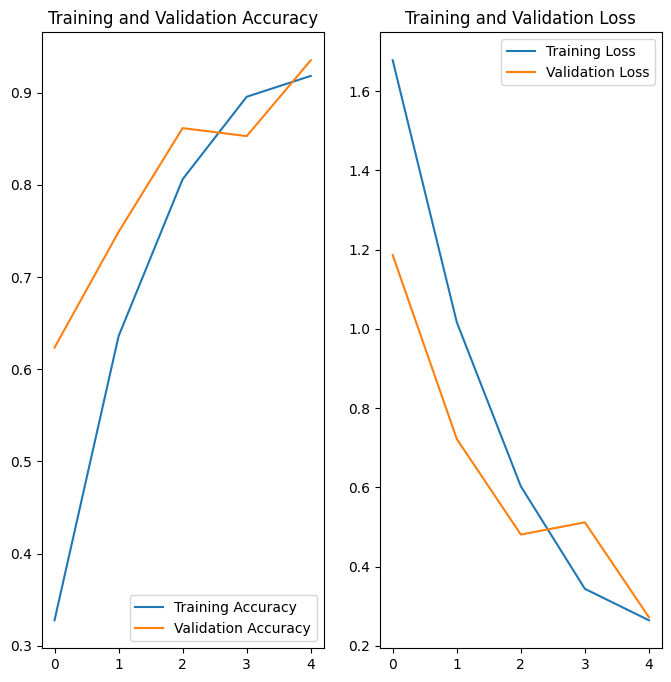

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
from keras.models import load_model

model.save(f'{filepath}.keras')



/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [42]:
from keras.preprocessing.image import img_to_array, load_img
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model

%cd /gdrive/MyDrive/Colab Notebooks/LegoDatasets

image_path = 'lego2x2Brick.JPG'

image = cv2.imread(image_path, 1)
image = cv2.resize(image, (img_width, img_height),
               interpolation = cv2.INTER_LINEAR)
x = img_to_array(image)
x = x.reshape((1,) + x.shape)

# load model
modelLoad = load_model(f'{filepath}.keras')

predictions = modelLoad.predict(x)
np.argmax(predictions, axis=1)

/gdrive/MyDrive/Colab Notebooks/LegoDatasets
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


AxisError: axis 2 is out of bounds for array of dimension 2

In [41]:
class_names[17]

'Plate_2x2_L'